# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | dunedin
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | rongelap
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | st. john's
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | kill devil hills
Processing Record 11 of Set 1 | quellon
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | pullman
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 17 of Set 1 | nar'yan-mar
Processing Record 18 of Set 1 | luderitz
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | ghadamis
Processing Record 21 of Set 1 | wailua homesteads
Processing Record

Processing Record 37 of Set 4 | basmat
Processing Record 38 of Set 4 | kismayo
Processing Record 39 of Set 4 | alghero
Processing Record 40 of Set 4 | yanji
Processing Record 41 of Set 4 | whitehorse
Processing Record 42 of Set 4 | sonsorol village
City not found. Skipping...
Processing Record 43 of Set 4 | qandala
Processing Record 44 of Set 4 | namdrik
Processing Record 45 of Set 4 | shkoder
Processing Record 46 of Set 4 | sinop
Processing Record 47 of Set 4 | sisimiut
Processing Record 48 of Set 4 | tralee
Processing Record 49 of Set 4 | weno
Processing Record 0 of Set 5 | malgrat de mar
Processing Record 1 of Set 5 | palmer
Processing Record 2 of Set 5 | jiuquan
Processing Record 3 of Set 5 | brisas de zicatela
Processing Record 4 of Set 5 | atafu village
Processing Record 5 of Set 5 | bowen
Processing Record 6 of Set 5 | verkhnevilyuysk
Processing Record 7 of Set 5 | labasa
Processing Record 8 of Set 5 | saguenay
Processing Record 9 of Set 5 | pacific grove
Processing Record 10 of

Processing Record 30 of Set 8 | island harbour
Processing Record 31 of Set 8 | cruzeiro do sul
Processing Record 32 of Set 8 | manta
Processing Record 33 of Set 8 | labrador city
Processing Record 34 of Set 8 | hadibu
Processing Record 35 of Set 8 | dire dawa
Processing Record 36 of Set 8 | mount gambier
Processing Record 37 of Set 8 | guachochi
City not found. Skipping...
Processing Record 38 of Set 8 | madang
Processing Record 39 of Set 8 | kaspiysk
Processing Record 40 of Set 8 | igrim
Processing Record 41 of Set 8 | tauranga
Processing Record 42 of Set 8 | key west
Processing Record 43 of Set 8 | holyhead
Processing Record 44 of Set 8 | hasaki
Processing Record 45 of Set 8 | roseti
Processing Record 46 of Set 8 | klaksvik
Processing Record 47 of Set 8 | santa ana
Processing Record 48 of Set 8 | ba
City not found. Skipping...
Processing Record 49 of Set 8 | salzwedel
Processing Record 0 of Set 9 | swakopmund
Processing Record 1 of Set 9 | hola prystan'
Processing Record 2 of Set 9 |

Processing Record 15 of Set 12 | karratha
Processing Record 16 of Set 12 | kununurra
Processing Record 17 of Set 12 | formosa
Processing Record 18 of Set 12 | macas
Processing Record 19 of Set 12 | okha
Processing Record 20 of Set 12 | stolin
Processing Record 21 of Set 12 | muzayri'
City not found. Skipping...
Processing Record 22 of Set 12 | posto fiscal rolim de moura
Processing Record 23 of Set 12 | balabac
Processing Record 24 of Set 12 | dakhla
Processing Record 25 of Set 12 | vanimo
Processing Record 26 of Set 12 | arno
Processing Record 27 of Set 12 | libreville
Processing Record 28 of Set 12 | palestine
Processing Record 29 of Set 12 | dungarpur
Processing Record 30 of Set 12 | antsohimbondrona
City not found. Skipping...
Processing Record 31 of Set 12 | malmyzh
Processing Record 32 of Set 12 | bundu
Processing Record 33 of Set 12 | anthony
Processing Record 34 of Set 12 | berezovyy
Processing Record 35 of Set 12 | galle
Processing Record 36 of Set 12 | shakhtersk
Processing R

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,27.82,58,75,0.89,US,1690412885
1,waitangi,-43.9535,-176.5597,9.34,89,95,2.68,NZ,1690412885
2,port-aux-francais,-49.3500,70.2167,4.84,77,78,18.14,TF,1690412703
3,dunedin,-45.8742,170.5036,8.22,56,84,6.71,NZ,1690412424
4,bilibino,68.0546,166.4372,11.94,67,35,2.09,RU,1690412886


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,27.82,58,75,0.89,US,1690412885
1,waitangi,-43.9535,-176.5597,9.34,89,95,2.68,NZ,1690412885
2,port-aux-francais,-49.3500,70.2167,4.84,77,78,18.14,TF,1690412703
3,dunedin,-45.8742,170.5036,8.22,56,84,6.71,NZ,1690412424
4,bilibino,68.0546,166.4372,11.94,67,35,2.09,RU,1690412886


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

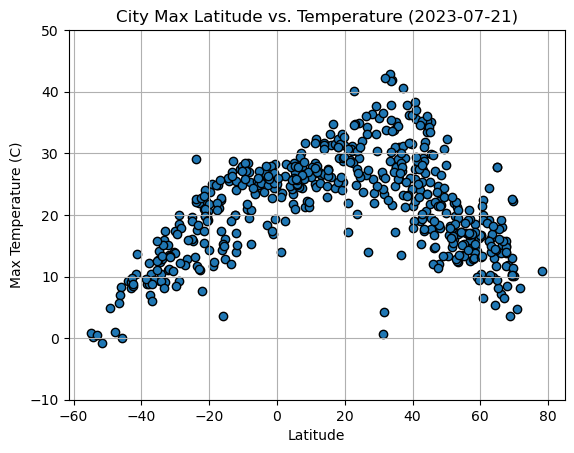

In [28]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-07-21)")
plt.grid(True)
plt.ylim(-10, 50)
plt.show()


# Save the figure
fig.savefig("../output_data/Fig1.png")

#### Latitude Vs. Humidity

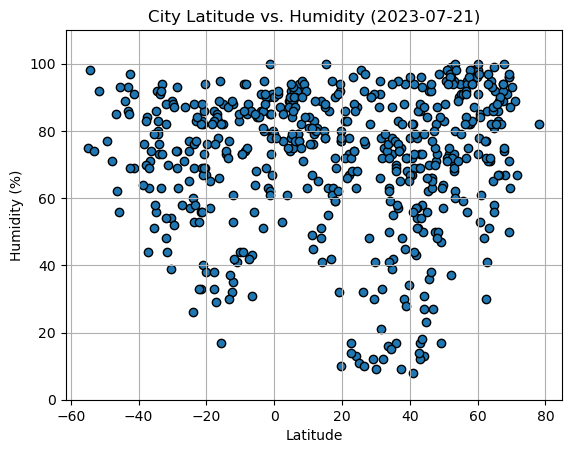

In [29]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots()
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-07-21)")
plt.grid(True)
plt.ylim(0, 110)
plt.show()

# Save the figure
fig.savefig("../output_data/Fig2.png")

#### Latitude Vs. Cloudiness

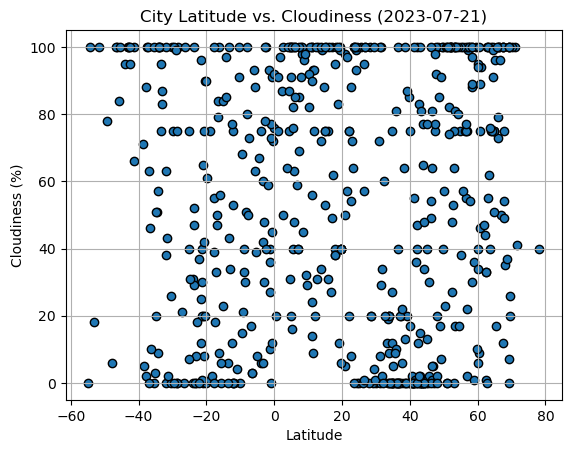

In [30]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots()
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-07-21)")
plt.grid(True)
plt.ylim(-5, 105)
plt.show()

# Save the figure
fig.savefig("../output_data/Fig3.png")


#### Latitude vs. Wind Speed Plot

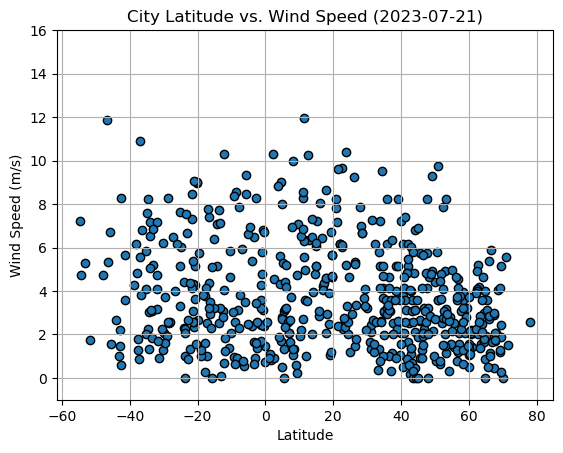

In [31]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots()
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-07-21)")
plt.grid(True)
plt.ylim(-1, 16)
plt.show()

# Save the figure
#plt.savefig("../output_data/Fig4.png")
fig.savefig("../output_data/Fig4.png")


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:

def regression_plot(df, x_col, y_col, line_eq_pos=None):
    x_values = df[x_col].values
    y_values = df[y_col].values

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Plot scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # If line_eq_pos is specified, display the line_eq text at the custom position
    if line_eq_pos is not None:
        plt.text(line_eq_pos['x'], line_eq_pos['y'], line_eq, fontsize=12, color="red")

    # Label plot
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Print r square value
    print(f"the r-value: {abs(rvalue)}")

    # Show plot
    plt.show()


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,27.82,58,75,0.89,US,1690412885
4,bilibino,68.0546,166.4372,11.94,67,35,2.09,RU,1690412886
5,rongelap,11.1635,166.8941,28.24,81,100,8.29,MH,1690412886
6,olonkinbyen,70.9221,-8.7187,4.68,89,100,5.55,SJ,1690412887
7,st. john's,47.5649,-52.7093,24.66,50,75,8.23,CA,1690412313


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,9.34,89,95,2.68,NZ,1690412885
2,port-aux-francais,-49.3500,70.2167,4.84,77,78,18.14,TF,1690412703
3,dunedin,-45.8742,170.5036,8.22,56,84,6.71,NZ,1690412424
10,quellon,-43.1167,-73.6167,8.14,93,100,1.03,CL,1690412888
13,blackmans bay,-43.0167,147.3167,9.18,86,100,2.20,AU,1690412888


###  Temperature vs. Latitude Linear Regression Plot

the r-value: 0.5791195205497622


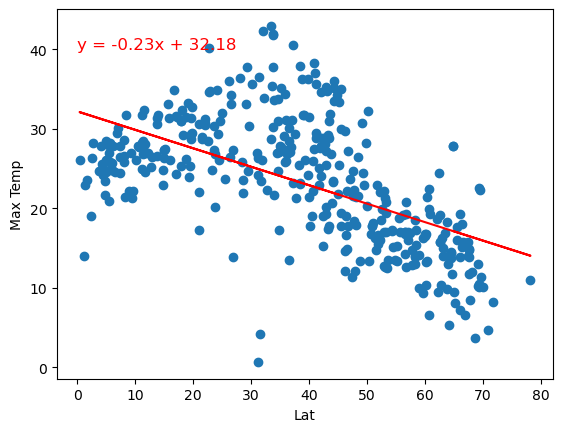

In [18]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df, "Lat", "Max Temp", line_eq_pos={'x': 0, 'y': 40})

the r-value: 0.8283446687505838


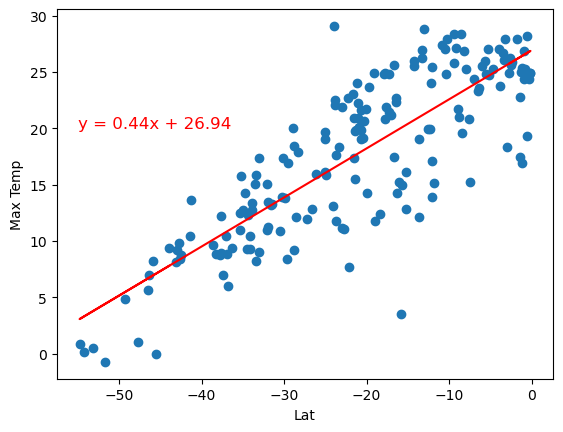

In [19]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df,"Lat","Max Temp",line_eq_pos={'x': -55, 'y': 20})

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

the r-value: 0.06505226266014486


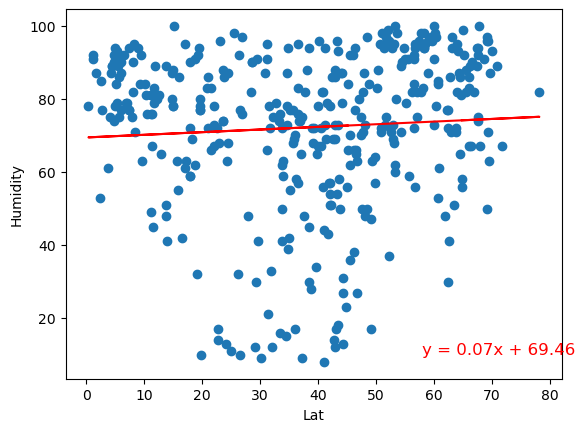

In [21]:
# Northern Hemisphere
regression_plot(northern_hemi_df,"Lat","Humidity",line_eq_pos={'x': 58, 'y': 10})

the r-value: 0.037518123751580396


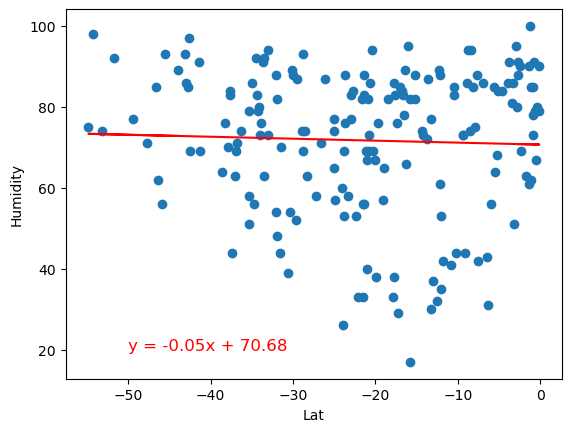

In [22]:
# Southern Hemisphere
regression_plot(southern_hemi_df,"Lat","Humidity",line_eq_pos={'x': -50, 'y': 20})

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

the r-value: 0.044788454185473996


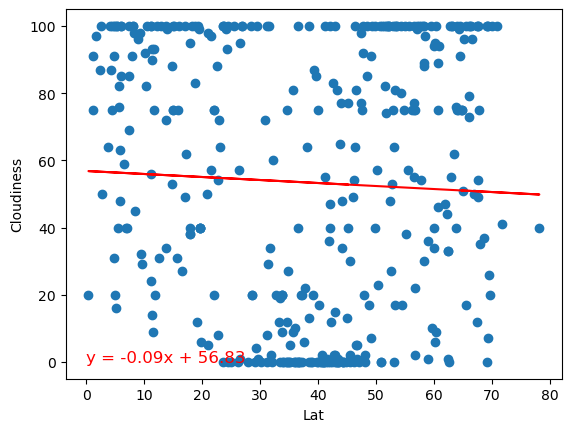

In [23]:
# Northern Hemisphere
regression_plot(northern_hemi_df,"Lat","Cloudiness", line_eq_pos={'x': 0, 'y': 0})

the r-value: 0.15320929515612575


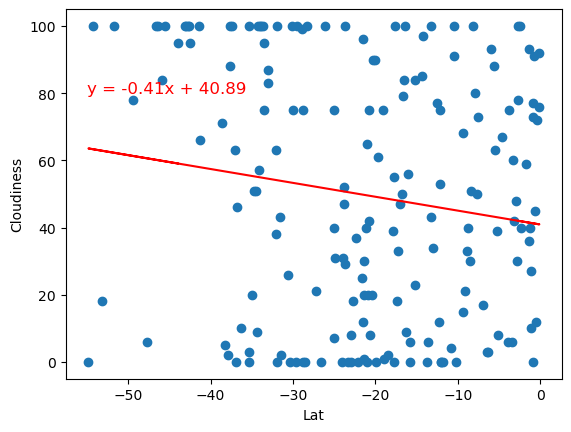

In [24]:
# Southern Hemisphere
regression_plot(southern_hemi_df,"Lat","Cloudiness", line_eq_pos={'x': -55, 'y': 80})

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

the r-value: 0.28790327526454523


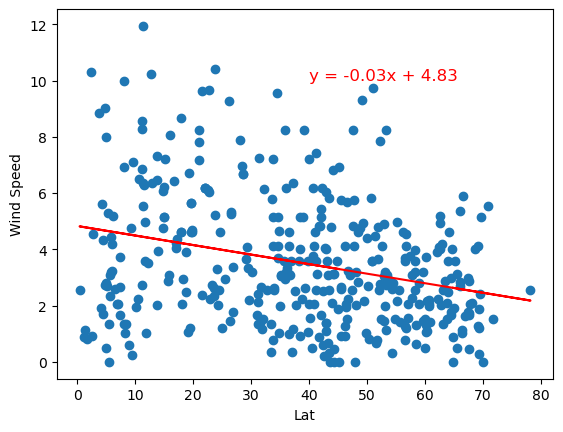

In [25]:
# Northern Hemisphere
regression_plot(northern_hemi_df,"Lat","Wind Speed",line_eq_pos={'x': 40, 'y': 10})

the r-value: 0.15352882248466454


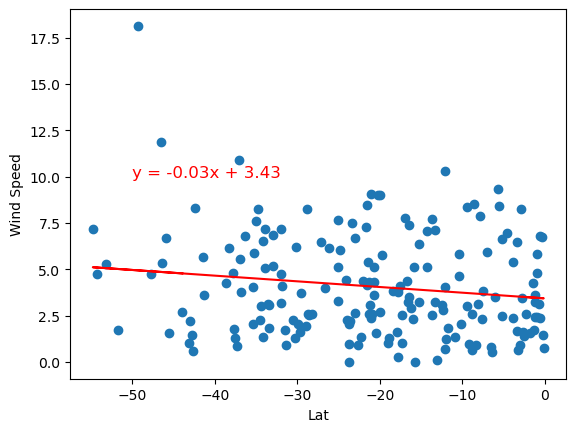

In [26]:
# Southern Hemisphere
regression_plot(southern_hemi_df,"Lat","Wind Speed",line_eq_pos={'x': -50, 'y': 10})

**Discussion about the linear relationship:** YOUR RESPONSE HERE